Loading the file and required headers for processing the file


In [1]:
#Loading the necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Q1:1 Read the dataset to the python environment
#Loading the file from a csv
input_data=pd.read_excel('iris.xls')
#first few rows
input_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Information about the file
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
input_data.shape

(150, 5)

The file contain 150 rows and 5 attributes

In [5]:
# Checking for null values 
input_data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

From the above its clear that there are null values which need to get removed either using mean,meadian,mode or with a specific value depending on scenario


In [6]:
# Checking the data types
input_data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

**Preprocessing**

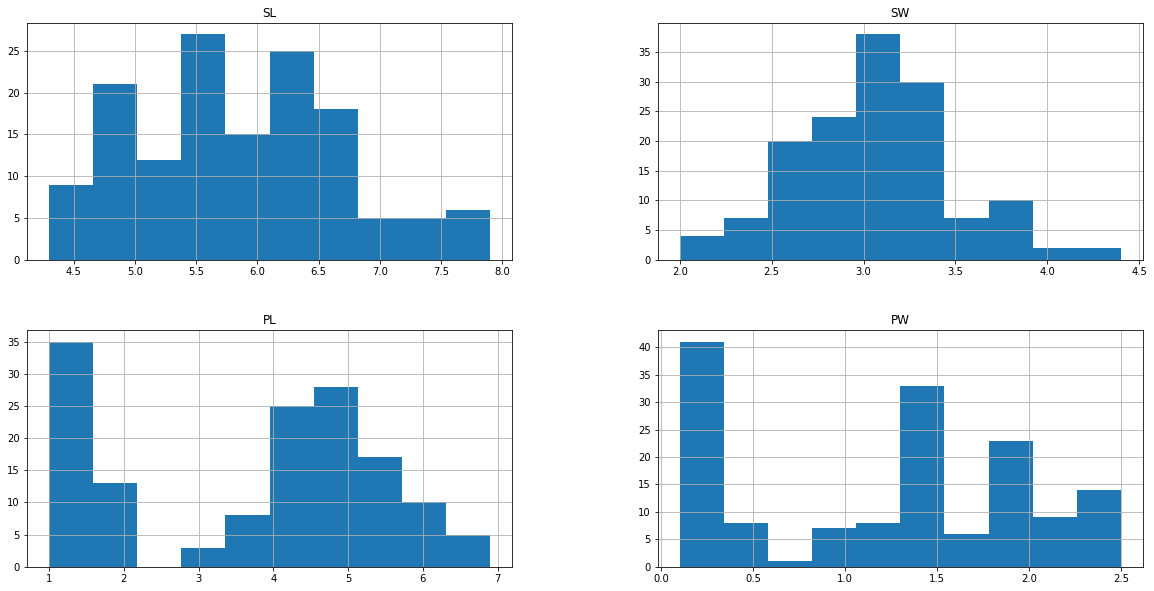

In [7]:
#Cheking skewness to plot frequency graph
frequency_graph=input_data.select_dtypes(include=['float'])
frequency_graph.hist(figsize=(20,10))
plt.show()

In [8]:
#Getting coloumn name
input_data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

**Removing Null values**

In [9]:
# Filling the values with median since its the best fit
#Filling the null value using a loop
for i in ['SL', 'SW', 'PL']:
  input_data[i]=input_data[i].fillna(input_data[i].median())

In [10]:
# Checking null values gone or not
input_data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Since the value is Zero its clear that null values have been replaced with median of the above Three attributes


**Checking Outliers**

Text(0.5, 1.0, 'Boxplot of SL')

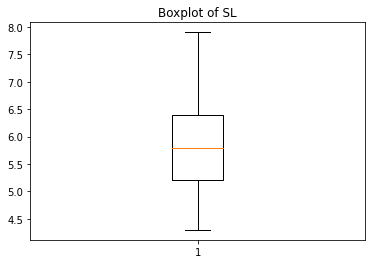

In [12]:
#Handling outliers
#Boxplot to find out outlier
#Ploting the beer service to check the outlier or not
plt.boxplot(input_data['SL'])
plt.title('Boxplot of SL')

No outlier in SL attribute

Text(0.5, 1.0, 'Boxplot of SW')

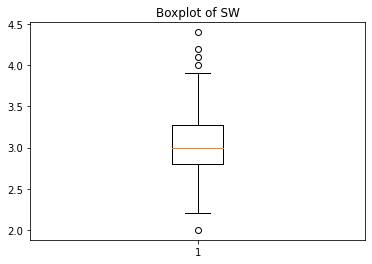

In [13]:
#Handling outliers
#Boxplot to find out outlier
#Ploting the beer service to check the outlier or not
plt.boxplot(input_data['SW'])
plt.title('Boxplot of SW')

Outlier present so need to remove it

In [14]:
#Outlier present so we need to eliminate the same
Q1=np.percentile(input_data['SW'], 25, interpolation='midpoint')
Q2=np.percentile(input_data['SW'], 50, interpolation='midpoint')
Q3=np.percentile(input_data['SW'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)


2.8
3.0
3.25


In [15]:
IQR=Q3-Q1
print(IQR)

0.4500000000000002


In [16]:
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(low_limit)
print(upper_limit)

2.1249999999999996
3.9250000000000003


In [17]:
#Finding the Outliers in the SW
outlier=[]
for x in input_data['SW']:
  if((x>upper_limit) or (x<low_limit)):
    outlier.append(x)

In [18]:
#Displaying the values
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [19]:
#Getting the index
index_value=input_data['SW']>upper_limit
input_data.loc[index_value].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [20]:
#Droping the values
input_data.drop([14, 15, 32, 33], inplace=True)

Text(0.5, 1.0, 'Boxplot of SW')

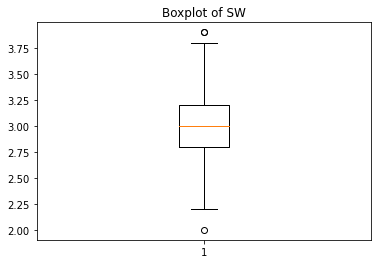

In [21]:
#Ploting the beer service to check the outlier removed or not
plt.boxplot(input_data['SW'])
plt.title('Boxplot of SW')

Outlier of SW removed

Text(0.5, 1.0, 'Boxplot of PL')

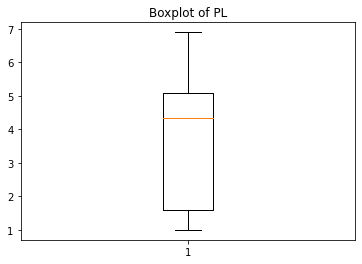

In [22]:
#Boxplot to find out outlier
#Ploting the beer service to check the outlier or not
plt.boxplot(input_data['PL'])
plt.title('Boxplot of PL')

No outlier present

Text(0.5, 1.0, 'Boxplot of PW')

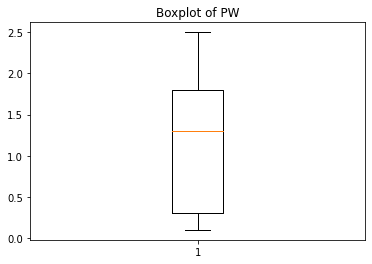

In [24]:
#Boxplot to find out outlier
#Ploting the beer service to check the outlier or not
plt.boxplot(input_data['PW'])
plt.title('Boxplot of PW')

No outlier present

Model to check the MSE 

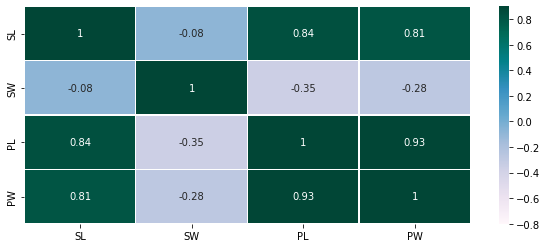

In [27]:
#Taking the corelation matrix
corelation_matrix=input_data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corelation_matrix, vmin=-0.8, vmax=0.9, annot=True, linewidths=0.2, cmap='PuBuGn')

In [28]:
#Creating a linear regression model
input_data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [35]:
# Removing the Categorical value from the dataset
input_data.drop(['Classification'],axis = 1, inplace = True)

In [36]:
#Variables
y=input_data['SL']
x=input_data.drop('SL', axis=1)

In [37]:
#Creating Test and Train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [38]:
#Model creation
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predicitons=model.predict(x_test)

In [39]:
from sklearn.metrics import mean_squared_error
print('MSE:',mean_squared_error(y_test,predicitons))

MSE: 0.15523213438563763


In [40]:
from sklearn.metrics import r2_score
print('R2:',r2_score(y_test,predicitons))


R2: 0.7470690836645052


Will Scaling help to get a better result?

In [41]:
#Standard scaling
x.describe()

,SW,PL,PW
count,146.000000,146.000000,146.000000
mean,3.016438,3.845205,1.225342
std,0.382555,1.706593,0.755834
min,2.000000,1.000000,0.100000
25%,2.800000,1.600000,0.300000
50%,3.000000,4.350000,1.300000
75%,3.200000,5.100000,1.800000
max,3.900000,6.900000,2.500000


In [42]:
#Scaling
from sklearn import preprocessing

In [43]:
standardisation = preprocessing.StandardScaler()
x= standardisation.fit_transform(x)

In [44]:
x=pd.DataFrame(x)
x.describe()

,0,1,2
count,1.460000e+02,1.460000e+02,1.460000e+02
mean,6.602405e-16,4.646207e-16,-6.661338e-16
std,1.003442e+00,1.003442e+00,1.003442e+00
min,-2.666117e+00,-1.672924e+00,-1.494001e+00
25%,-5.677176e-01,-1.320136e+00,-1.228482e+00
50%,-4.311779e-02,2.968090e-01,9.911512e-02
75%,4.814820e-01,7.377939e-01,7.629136e-01
max,2.317581e+00,1.796158e+00,1.692232e+00


In [45]:
#Linear Model Checking
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predicitons=model.predict(x_test)
print('MSE:',mean_squared_error(y_test,predicitons))
print('R2:',r2_score(y_test,predicitons))

MSE: 0.15523213438563752
R2: 0.7470690836645054


**We can conclude that saling wont affect the model since the MSE and R2  value have no change**

**Q3 : Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)**

In [101]:
# Since data have lost doing the pre processing again
#Loading the file from a csv
input_data=pd.read_excel('iris.xls')
#first few rows
input_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [102]:
#Filling the null value using a loop
for i in ['SL', 'SW', 'PL']:
  input_data[i]=input_data[i].fillna(input_data[i].median())

In [103]:
# Checking No null values
input_data.isna().sum()


SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Removing outlier

In [104]:
#Droping the values - SW
input_data.drop([14, 15, 32, 33], inplace=True)

In [105]:
input_data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [106]:
# Variable creation
y=input_data[['Classification']]
x=input_data.drop(['Classification'],axis=1)

In [107]:
#Spliting the input data set into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [108]:
# Checking the count of test and train data
x_train.shape

(116, 4)

In [109]:
x_test.shape

(30, 4)

In [110]:
#Model creation
from sklearn.linear_model import LogisticRegression
logic_model=LogisticRegression()
logic_model.fit(x_train,y_train)
y_pred=logic_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [114]:
#Performance for evaluation
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score
print("Accuracy is:",accuracy_score(y_test,y_pred))


Accuracy is: 0.9333333333333333


Logistic Regression model is the best for Classification_Iris-setosa since evaluation parameters are 100% 

In [115]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
accuracy_values=[]
neighbours=np.arange(1,15)
for k in neighbours:
  classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  accuracy_values.append(acc)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [116]:
accuracy_values

[0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 1.0]

Text(0, 0.5, 'Accuracy')

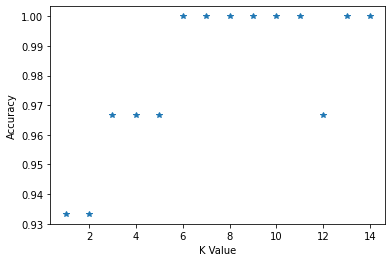

In [117]:
# To check whic is the most accurate K value we plot a graph
plt.plot(neighbours,accuracy_values,'*')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [118]:
# Making a model with K value as 1
classifier = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [119]:
print("Accuracy is:",accuracy_score(y_test,y_pred))

Accuracy is: 0.9333333333333333


In [120]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
data_model= DecisionTreeClassifier()
data_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [121]:
y_pred=data_model.predict(x_test)

In [122]:
#Accuracy 
print("Accuracy is :",accuracy_score(y_test,y_pred))

Accuracy is : 0.9333333333333333


In [123]:
#SVM Model - Linear Model
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')

In [124]:
svm_linear.fit(x_train,y_train)
y_pred = svm_linear.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [140]:
print("Accuracy using Linear model",accuracy_score(y_test,y_pred))

Accuracy using Linear model 0.9666666666666667


In [139]:
# SVM Polynomial
svm_poly = SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [138]:
print("Accuracy using Polynomial",accuracy_score(y_test,y_pred))

Accuracy using Polynomial 0.9666666666666667


In [137]:
# RBF
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(x_train,y_train)
y_pred=svm_rbf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [136]:
print("Accuracy using RBF model",accuracy_score(y_test,y_pred))

Accuracy using RBF model 0.9333333333333333


In [135]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [132]:
print("Accuracy using Linear model",accuracy_score(y_test,y_pred))

Accuracy using Linear model 0.9333333333333333


From the above Supervised learning its clear that SVM- Polynomial is the best method for the given data set of Iris with an accuracy of **96%**
While ***all other models*** (LogisticRegression
logic_model=LogisticRegression(),KNN,SVM-Linear,SVM-RBF,Random Forest
)provide an accuracy of **93%** ONLY